In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
with open('algoparams_from_ui.json') as f:
    data=json.load(f)

print(data["design_state_data"]["target"])

{'prediction_type': 'Regression', 'target': 'petal_width', 'type': 'regression', 'partitioning': True}


In [2]:
print(data["design_state_data"]["feature_handling"])

{'sepal_length': {'feature_name': 'sepal_length', 'is_selected': True, 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values', 'impute_value': 0}}, 'sepal_width': {'feature_name': 'sepal_width', 'is_selected': True, 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'custom', 'impute_value': -1}}, 'petal_length': {'feature_name': 'petal_length', 'is_selected': True, 'feature_variable_type': 'numerical', 'feature_details': {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values', 'impute_value': 0}}, 'petal_width': {'feat

In [3]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()
#no nulll value in column for imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

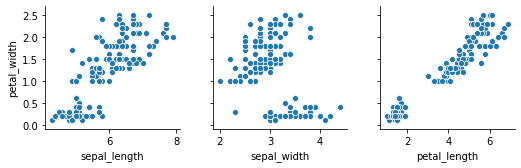

In [7]:
sns.pairplot(data=df,
             x_vars=["sepal_length","sepal_width","petal_length"],
             y_vars="petal_width")

# Logistics Regression 

In [8]:
flower_mapping={"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2}
df["species"]=df["species"].map(flower_mapping)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
X=df[["sepal_length","sepal_width","petal_length","petal_width"]].values
y=df[["species"]].values

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
print(x_train.shape)
model=LogisticRegression()

(112, 4)


In [12]:
model.fit(x_train,y_train)

C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.score(x_train,y_train)

0.9375

In [14]:
y_test=model.predict(x_test)

In [15]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
from sklearn import metrics
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.78      1.00      0.88        50
           2       1.00      0.72      0.84        50

    accuracy                           0.91       150
   macro avg       0.93      0.91      0.90       150
weighted avg       0.93      0.91      0.90       150



In [17]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 50  0]
 [ 0 14 36]]
